In [1]:
%matplotlib notebook
import numpy as np
import itertools

from config import CFG
from dataset import load_and_prepare_data
from kde_classes import Model, KDE

from models.multi_gaussian import settings, grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

Welcome to JupyROOT 6.14/04


In [2]:
mg = np.load(CFG['paths']['mg_mc'])
model = Model(mg, settings)

                   y INFO: Creating 1D phase space in range (-5.000000, 5.000000)
                   x INFO: Creating 1D phase space in range (-5.000000, 5.000000)
        PhspCombined INFO: Creating combined phase space of 2 components
        PhspCombined INFO: Adding component phase space "y", dim=1
        PhspCombined INFO: Adding component phase space "x", dim=1
        PhspCombined INFO: Resulting dimensionality is 2


In [3]:
kde = KDE(model, adaptive=False)
binned_kernel_density = kde.generate_binned_kernel_density()

 BinnedKernelDensity INFO: Creating binned kernel density over 2D phase space
 BinnedKernelDensity INFO: Map size=10000
 BinnedKernelDensity INFO: Will read 10000 events (skipping first 0)
 BinnedKernelDensity INFO: Will read branch "y" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "x" from tree "tree"
 BinnedKernelDensity INFO: 9841 events read in from "tree", 159 out
 BinnedKernelDensity INFO: Will use uniform density for approximation
 BinnedKernelDensity INFO: Convolution of approx. density using rectangular grid
 BinnedKernelDensity INFO: Normalising density
 BinnedKernelDensity INFO: Average PDF value before normalisation is 0.989048


In [4]:
out_bins = []
for key in settings:
    out_bins.append(np.linspace(settings[key]['range'][0],
                                settings[key]['range'][1],
                                settings[key]['nbins']))
coords = np.array(list(itertools.product(*out_bins)))

In [5]:
nbins = 100

print('Evaluate KDEs:')
pdf_vals = np.asarray([kde.eval_point(coord) for coord in coords])
shape = np.ones(len(settings.keys()), dtype=int)*nbins
pdf_vals = pdf_vals.reshape(*shape)

Evaluate KDEs:
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.00

In [6]:
X, Y = np.meshgrid(*out_bins)

<IPython.core.display.Javascript object>


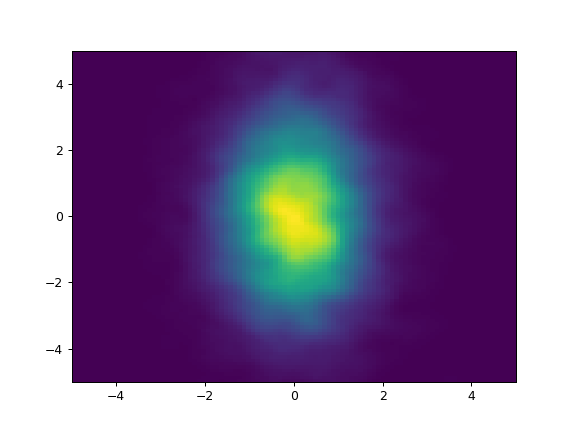

In [7]:
plt.figure()

plt.pcolormesh(X, Y, pdf_vals)

<IPython.core.display.Javascript object>


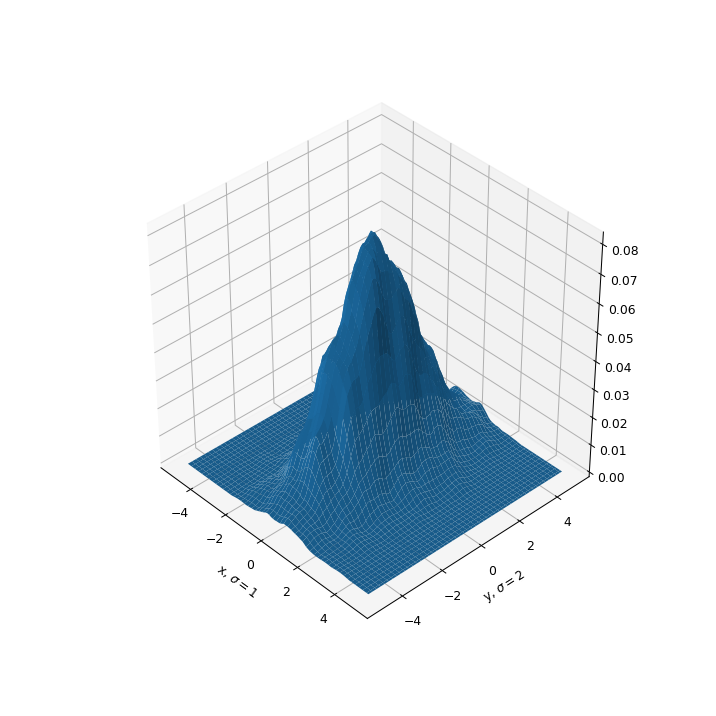

Text(0.5,0,'y, $\\sigma=2$')

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')